In [70]:
# import os
# os.chdir("/home/khantstop/movement_metrics/movement-metrics")
# print("Updated Working Directory:", os.getcwd())


In [71]:
from functools import partial
import datetime

import pandas as pd
import src.utils as utils
import src.content as content

from wikicharts import (
    active_editors,
    content_gap_gender,
    quality_articles,
    content_interactions,
    pageviews_by_user_automated,
    net_new_content,
    returning_editors,
    regional_active_editors_linechart,
    regional_unique_devices_linechart,
    unique_devices,
    account_registrations,
    active_administrators,
    new_active_editors
)

import src.metrics



In [72]:
# Update monthly metrics with latest monthly data.

# All the date parameters are determined from these two:
# * metrics_month_text (e.g. "2023-08"): the month metrics are generated for
# * mediawiki_history_snapshot (e.g. "2023-08"): the version of mediawiki_history
#   used to generate the editing metrics. This should generally be the latest available,
#   even if you are not generating metrics for the latest month.
#
# Both key parameters are generated automatically by assuming they are the last completed
# month, but you can manually set them to different values if necessary.

last_month = datetime.date.today().replace(day=1) - datetime.timedelta(days=1)

metrics_month_text = last_month.strftime("%Y-%m")

src.metrics.update(metrics_month_text)

Running active_editors 


Running active_editors_region_type                                              6]]


Running active_admins 


25/02/11 19:53:49 WARN DAGScheduler: Broadcasting large task binary with size 1104.0 KiB
25/02/11 19:53:49 WARN DAGScheduler: Broadcasting large task binary with size 1037.4 KiB
Running account_registrations                                                   


Running mobile_edits                                                            


Running new_editor_retention                                                    


Now on project 50 of 354 (bug.wikipedia.org)
Now on project 100 of 354 (fr.wikipedia.org)
Now on project 150 of 354 (jbo.wikipedia.org)
Now on project 200 of 354 (mhr.wikipedia.org)
Now on project 250 of 354 (pfl.wikipedia.org)
Now on project 300 of 354 (sw.wikipedia.org)
Now on project 350 of 354 (zh-classical.wikipedia.org)



Running pageviews 
Running automated_pageviews                                                     


Running page_previews                                                           


Running pageviews_referral                                                      


Running regional_unique_devices                                                 


Running unique_devices                                                          


Running total_quality_articles                                                  


Running content_gap                                                             


In [73]:
metrics = utils.load_all_metric_files()

In [74]:
# This automatically picks the latest month in the data as the reporting period but you
# can replace the line to manually specify any month you choose.
# For example: `month_to_report = pd.Period("2023-06", freq="M")`

month_to_report = metrics.index[-1]
calculate_report = partial(utils.calc_rpt, reporting_period=month_to_report)
format_report = partial(utils.format_report, reporting_period=month_to_report)

## Essential metrics report

In [75]:
essential_metrics = [
    "content interactions",
    "unique devices",
    "Northern & Western Europe unique devices",
    "North America unique devices",
    "East, Southeast Asia, & Pacific unique devices",
    "Central & Eastern Europe & Central Asia unique devices",
    "Latin America & Caribbean unique devices",
    "Middle East & North Africa unique devices",
    "South Asia unique devices",
    "Sub-Saharan Africa unique devices",
    "new Wikipedia articles",
    "new Commons content pages",
    "new Wikidata entities",
]


(
    metrics
    .reindex(essential_metrics, axis="columns")
    .apply(calculate_report)
    .transpose()
    .pipe(format_report, metrics_type="essential")

)

## Core annual plan metrics report

In [76]:
core_metrics = [
    "unique devices",
    "South Asia unique devices",
    "Latin America & Caribbean unique devices",
    "North America unique devices",
    "Northern & Western Europe unique devices"
]

(
    metrics
    .reindex(core_metrics, axis="columns")
    .apply(calculate_report)
    .transpose()
    .pipe(format_report, metrics_type="core")
)

## Contributors metrics

In [77]:
contributors_pipeline_metrics = [
    "active editors", 
    "active editors developed wikis",
    "active editors emerging wikis", 
    "new active editors",
    "new active editors developed wikis",
    "new active editors emerging wikis", 
    "active administrators",
    "active administrators developed wikis",
    "active administrators emerging wikis", 
    "account registrations",
    "account registrations developed wikis",
    "account registrations emerging wikis",
    "active editors represented regions",
    "active editors underrepresented regions",
    "returning active editors"
]

(
    metrics
    .reindex(contributors_pipeline_metrics, axis="columns")
    .apply(calculate_report)
    .transpose()
    .pipe(format_report, metrics_type="contributors metrics")
)

# Content Gap Metrics

In [78]:
content_gap_metrics = [
    "quality articles",
    "quality articles in developed Wikipedias",
    "quality articles in emerging Wikipedias",
    "quality articles about places",
    "quality articles in developed Wikipedias about places",
    "quality articles in developed Wikipedias about places in underrepresented regions",
    "quality articles in emerging Wikipedias about places",
    "quality articles in emerging Wikipedias about places in underrepresented regions",
    "quality biographies",
    "quality biographies in developed Wikipedias",
    "quality biographies in developed Wikipedias of women and gender-diverse people",
    "quality biographies in emerging Wikipedias",
    "quality biographies in emerging Wikipedias of women and gender-diverse people",
    "new quality articles", 
    "new quality articles in developed Wikipedias",
    "new quality articles in emerging Wikipedias",
    "new quality articles about places",
    "new quality articles in developed Wikipedias about places",
    "new quality articles in developed Wikipedias about places in underrepresented regions",
    "new quality articles in emerging Wikipedias about places",
    "new quality articles in emerging Wikipedias about places in underrepresented regions",
    "new quality biographies",
    "new quality biographies in developed Wikipedias",
    "new quality biographies in developed Wikipedias of women and gender-diverse people",
    "new quality biographies in emerging Wikipedias",
    "new quality biographies in emerging Wikipedias of women and gender-diverse people"
]


# Check if any value in the 'content_gap_metrics' columns for the 'month_to_report' row is NaN and removes that month.
# This is to ensure that the report will generate even if the core metrics are released before the content gaps which can sometimes be delayed.


if metrics.loc[month_to_report, content_gap_metrics].isna().any():
    month_to_report = metrics.index[-2]

(
    metrics
    .reindex(content_gap_metrics, axis="columns")
    .apply(utils.calc_rpt, reporting_period=month_to_report, comparison='mom')
    .transpose()
    .pipe(format_report, metrics_type="content gap", reporting_period=month_to_report)
)

## Core annual plan and essential metric charts

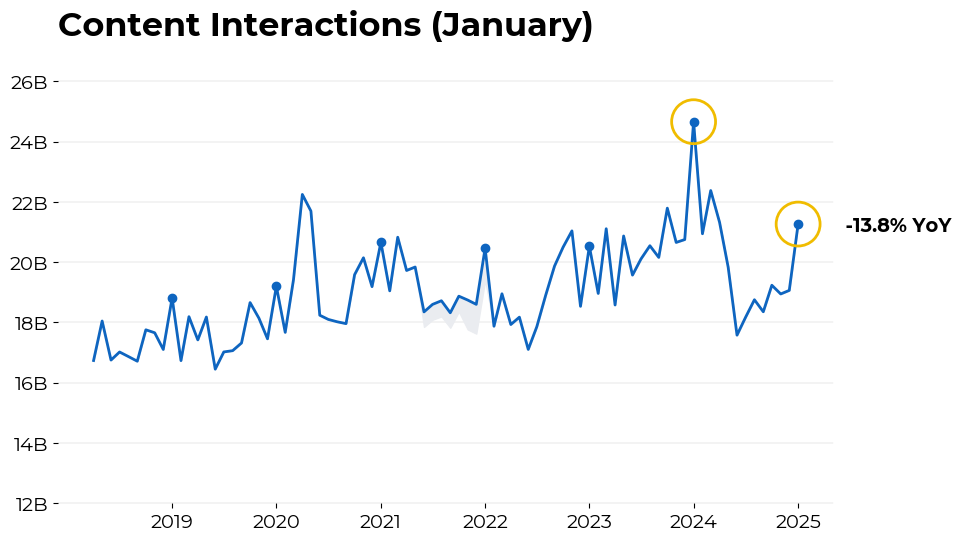

In [79]:
content_interactions.main()

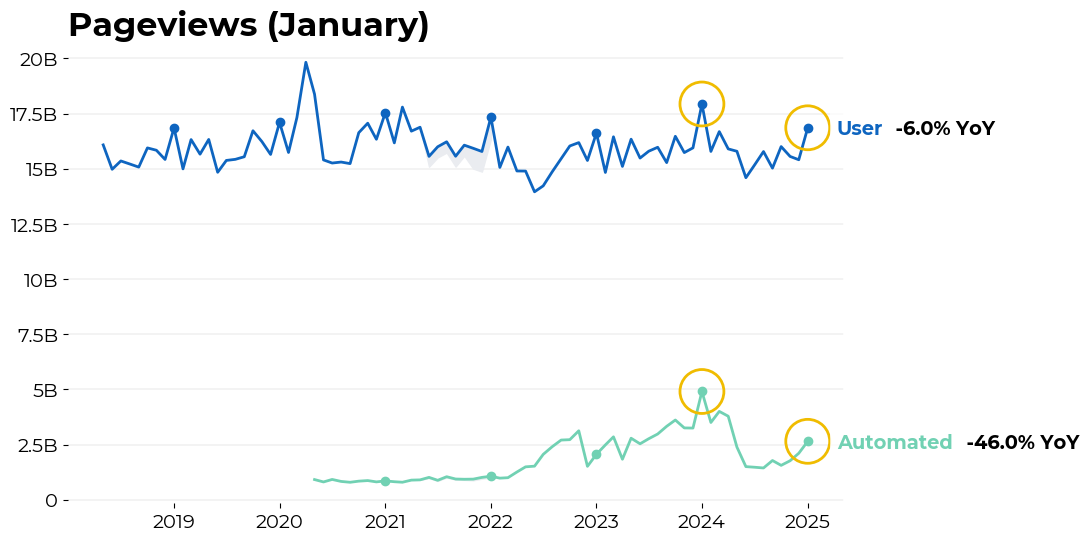

In [80]:
pageviews_by_user_automated.main()

Formatting may look incorrect in jupyter notebook window but the saved chart image will still be correct.


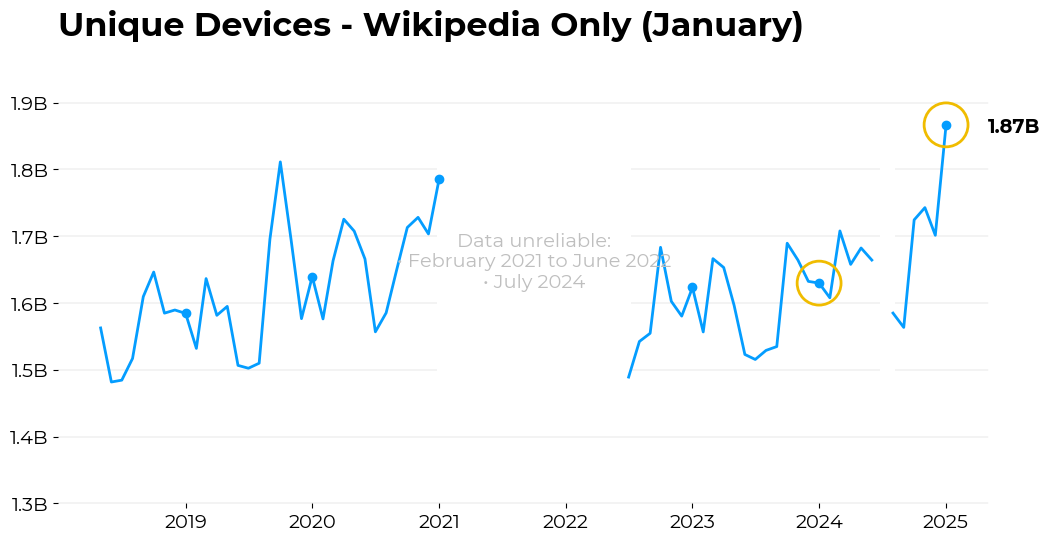

In [81]:
unique_devices.main()

Formatting may look incorrect in jupyter notebook window but the saved chart image will still be correct.


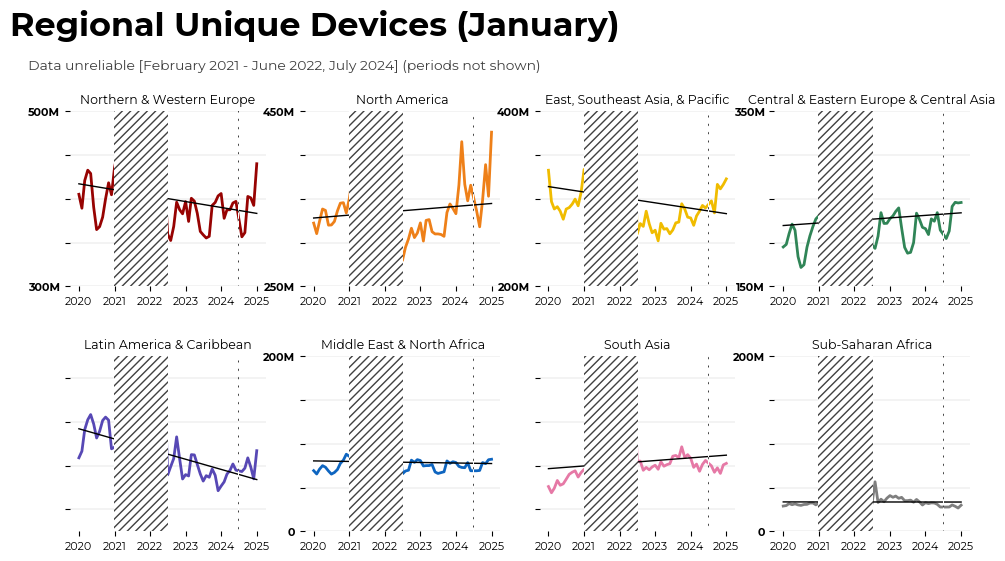

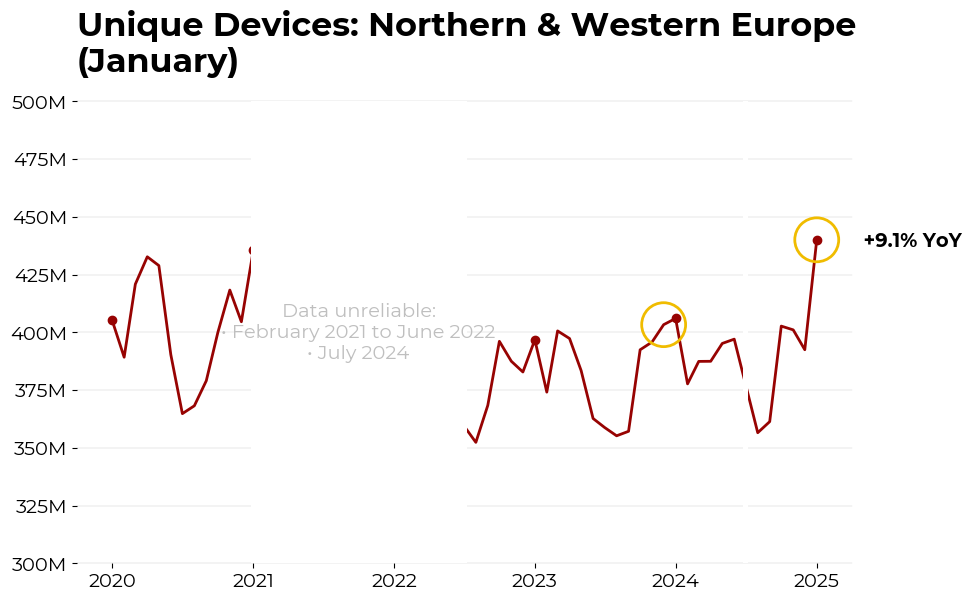

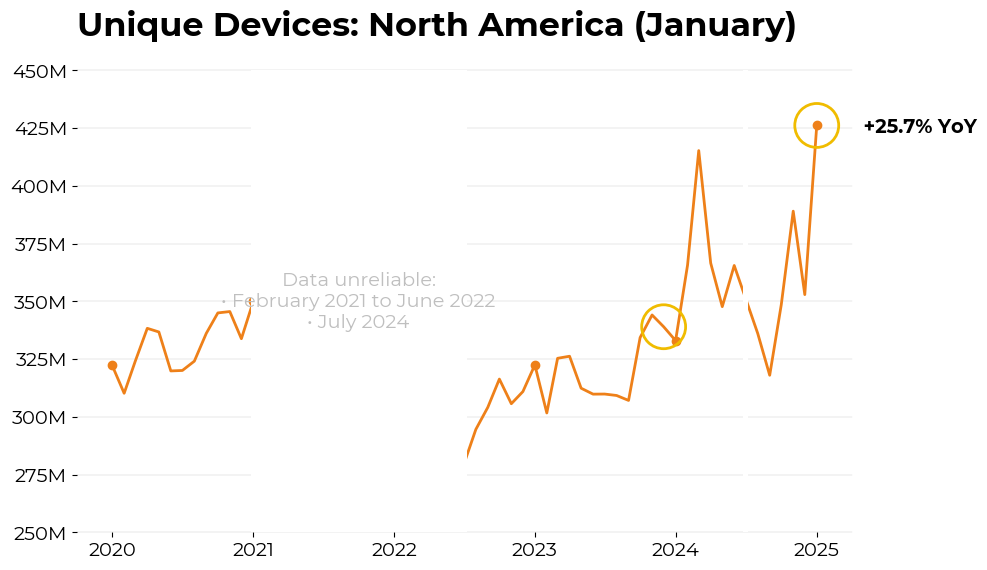

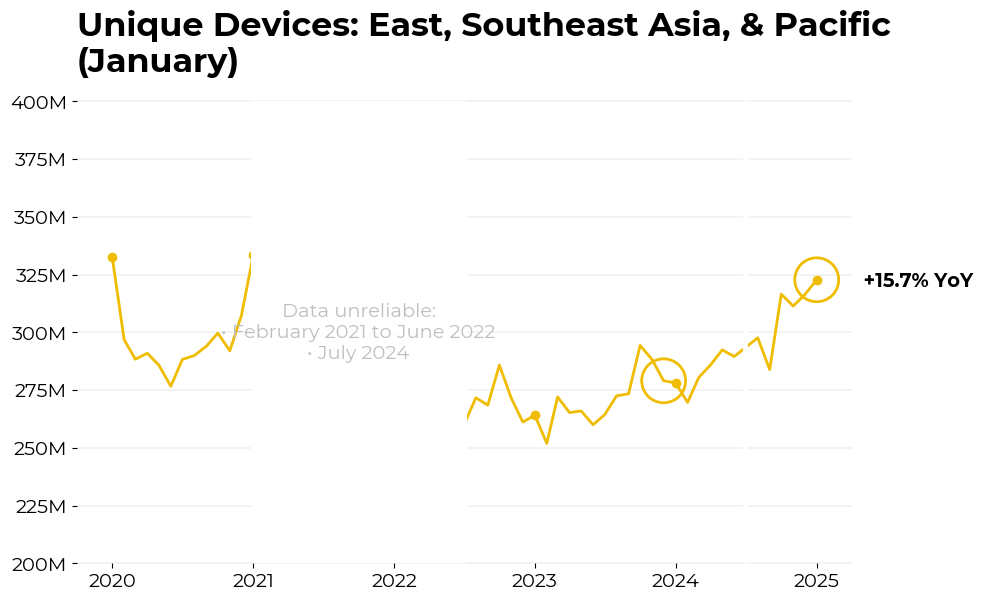

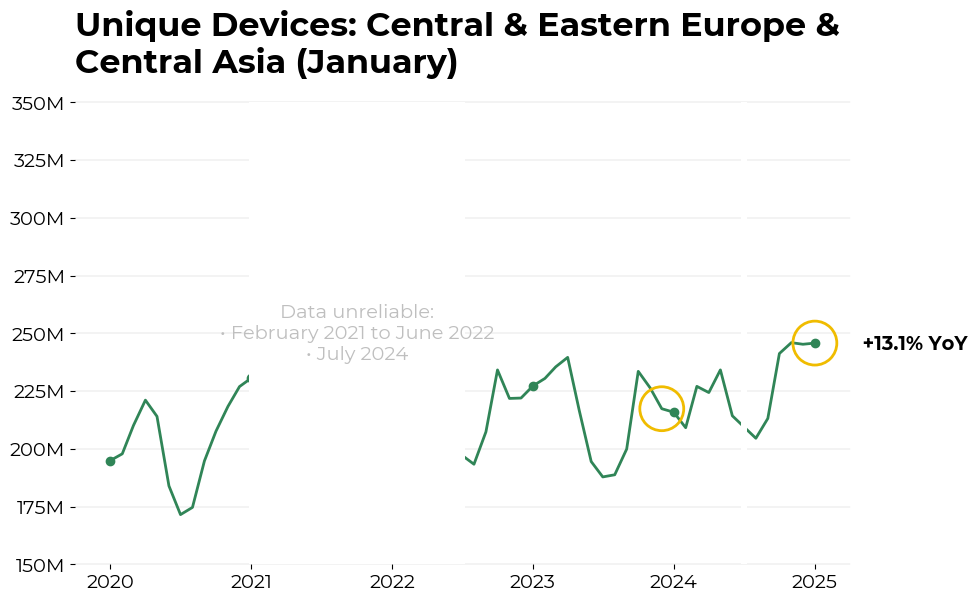

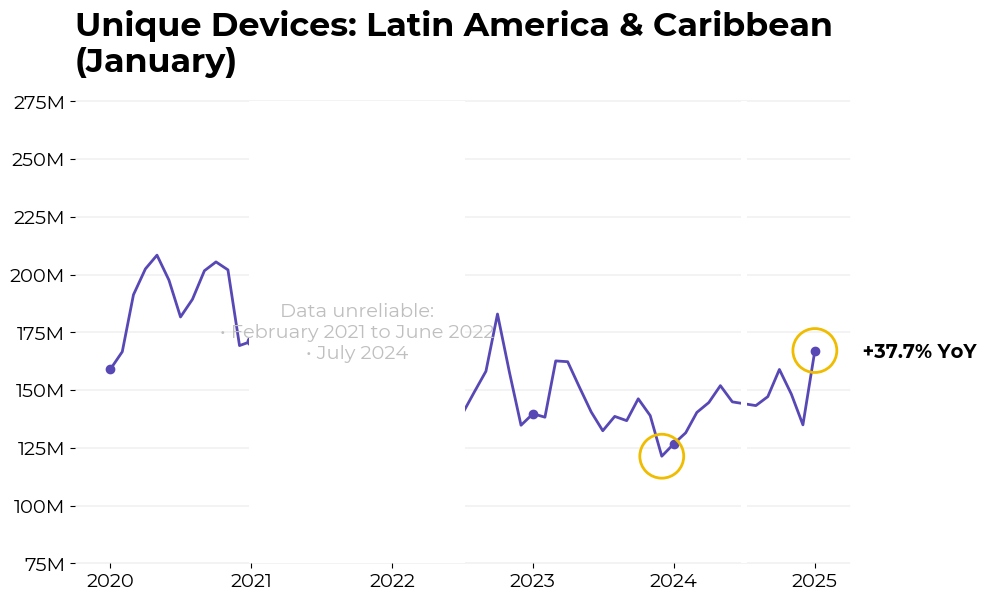

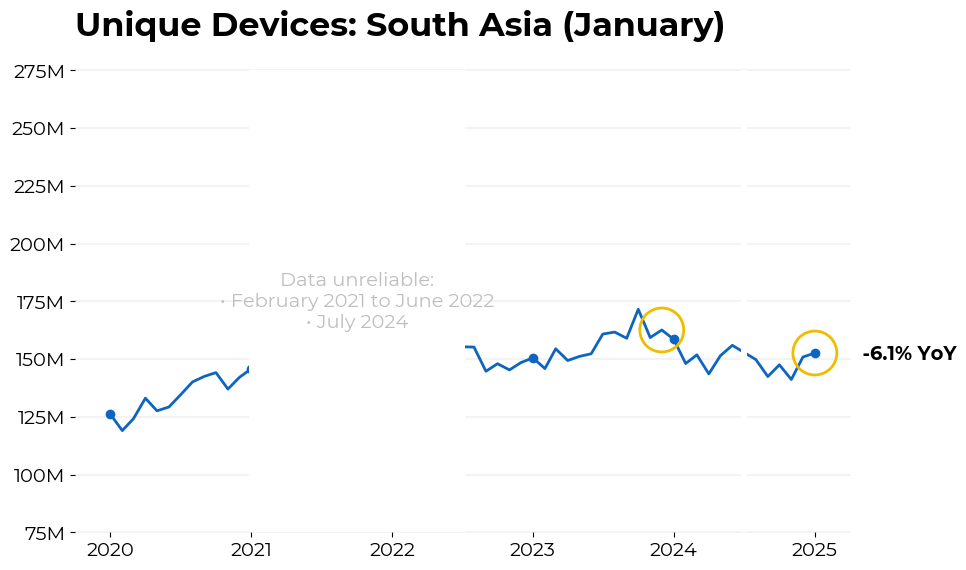

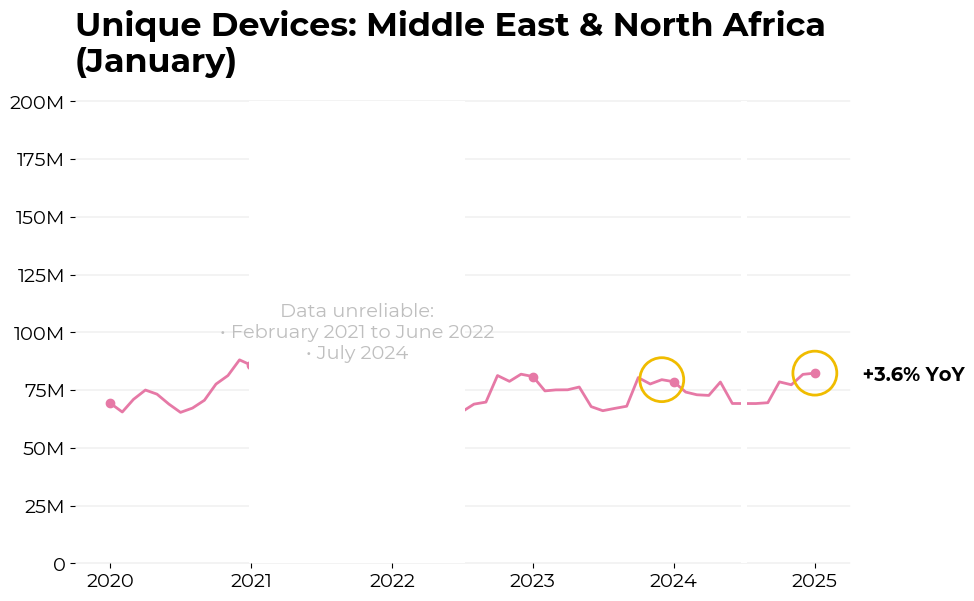

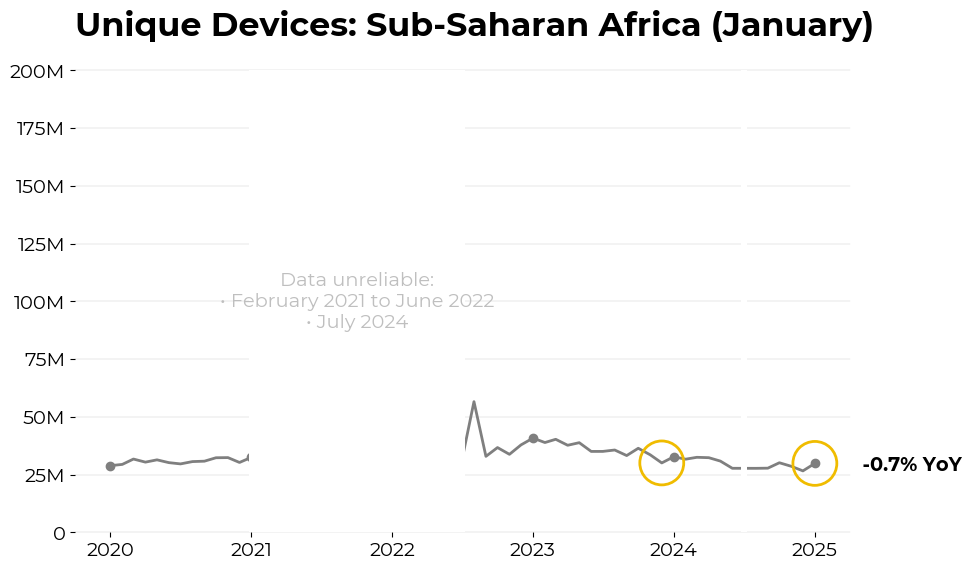

In [82]:
regional_unique_devices_linechart.main()

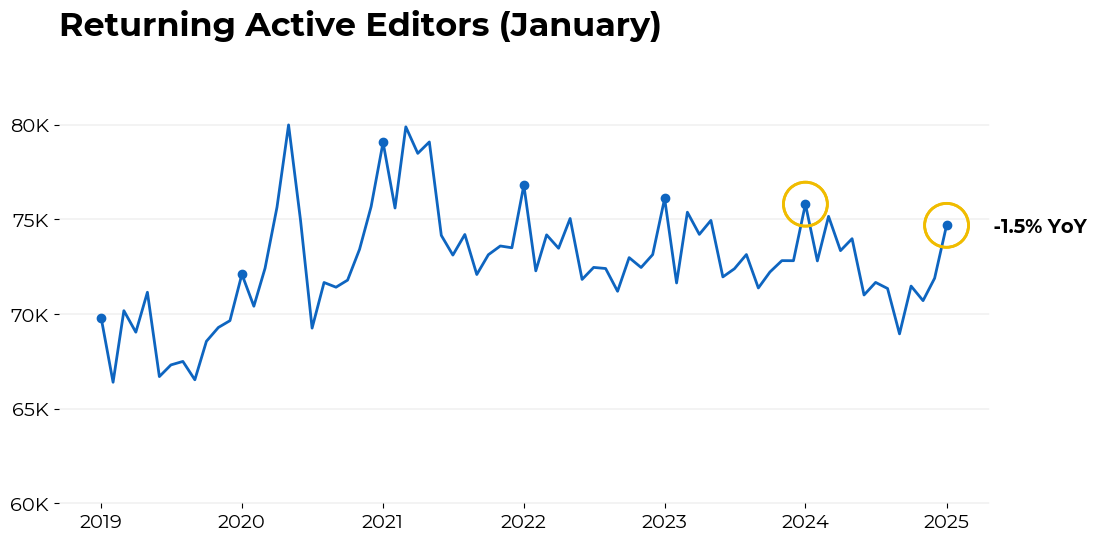

In [93]:
returning_editors.main()

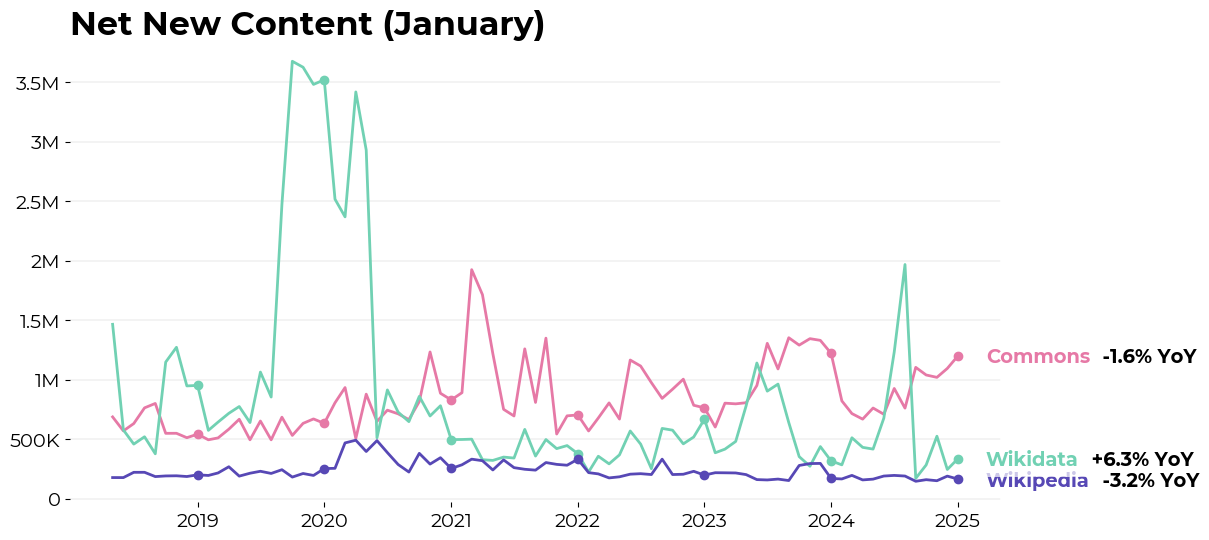

In [84]:
net_new_content.main()

Content Gaps Chart


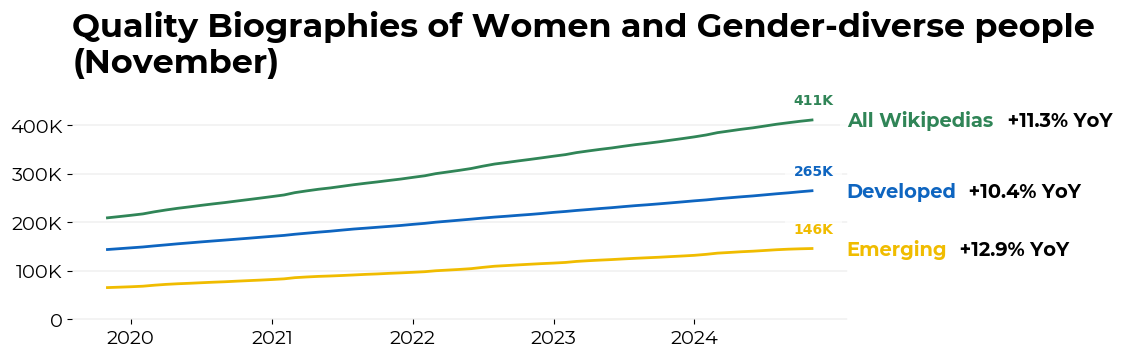

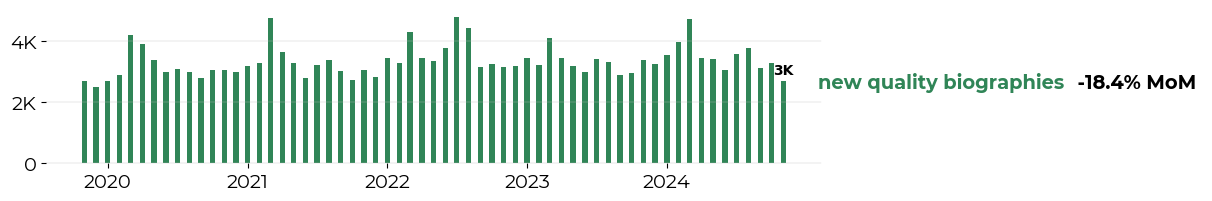

In [85]:
content_gap_gender.main()

Content Gaps Chart: quality articles


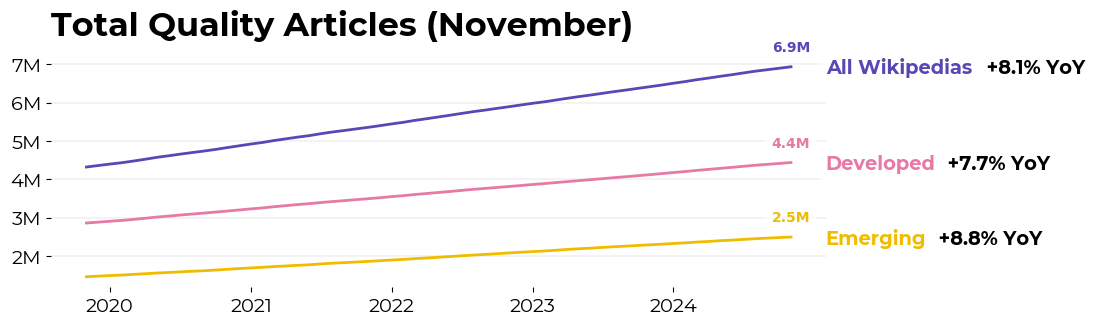

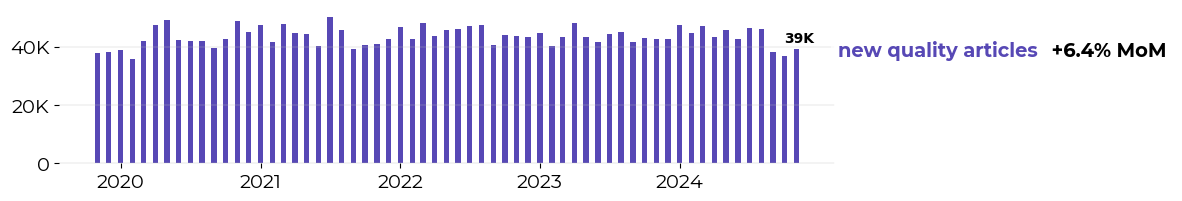

In [86]:
quality_articles.main()

Generating Account Registrations Charts


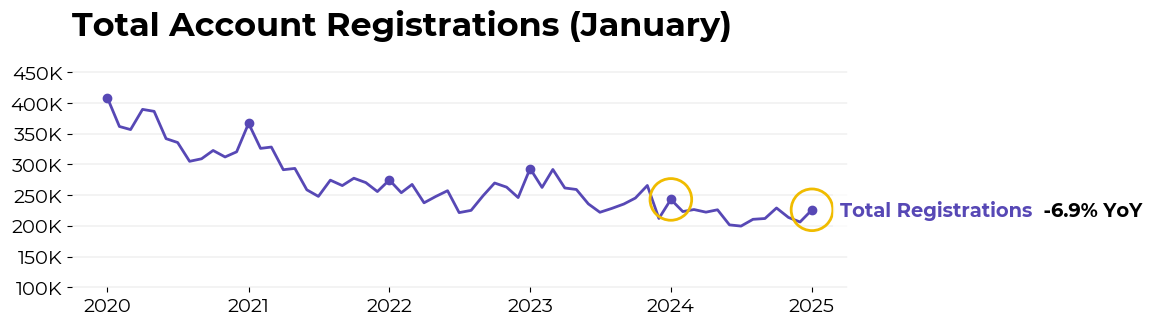

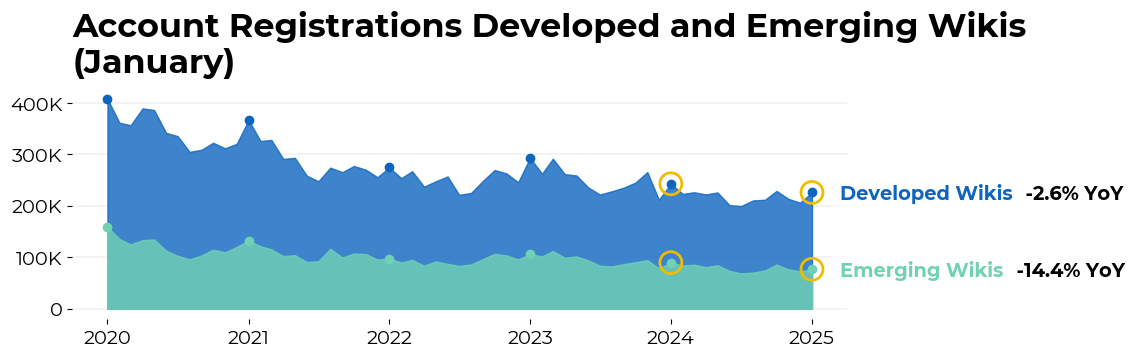

In [87]:
account_registrations.main()

Generating Charts: Active Administrators


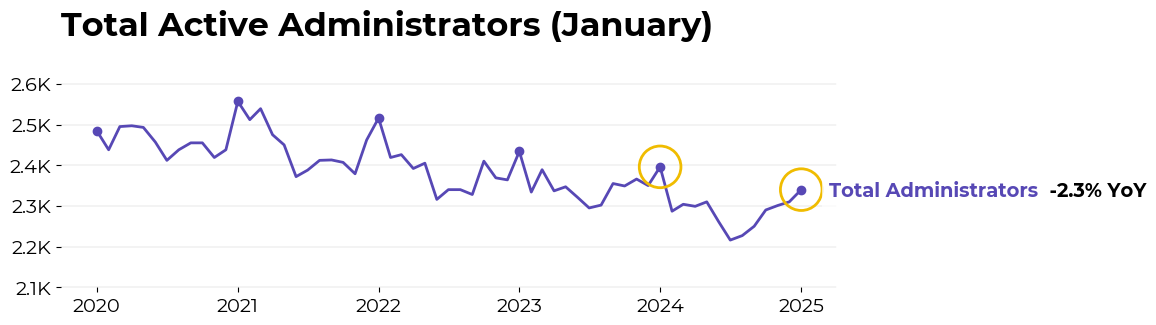

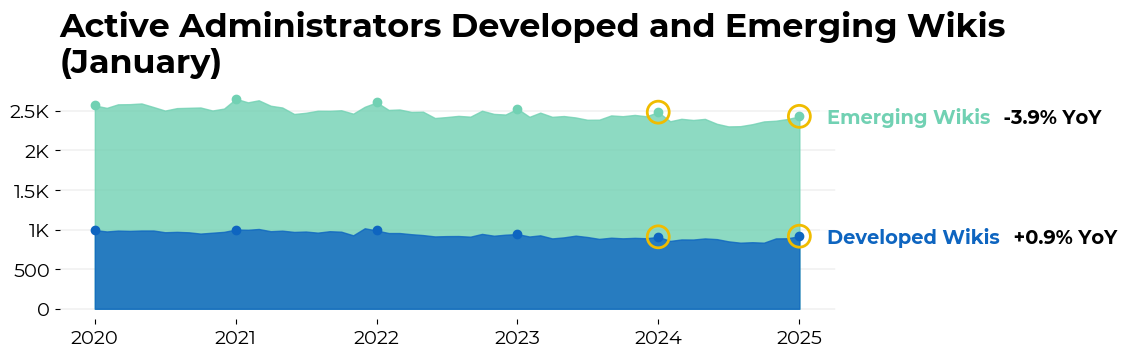

In [88]:
active_administrators.main()

Generating Charts: Active Editors


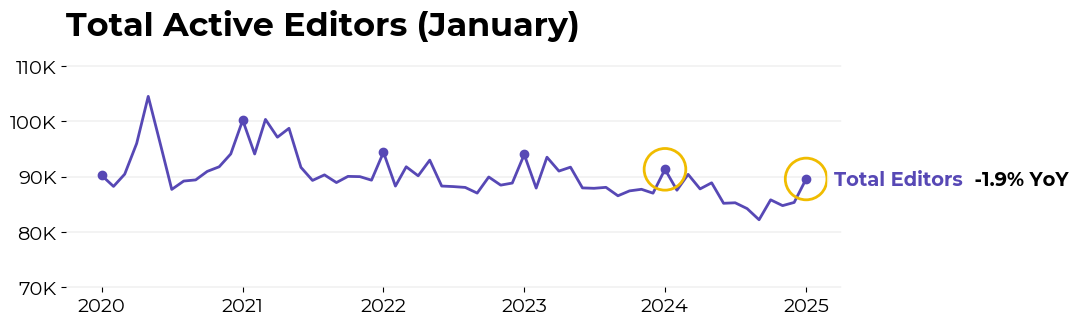

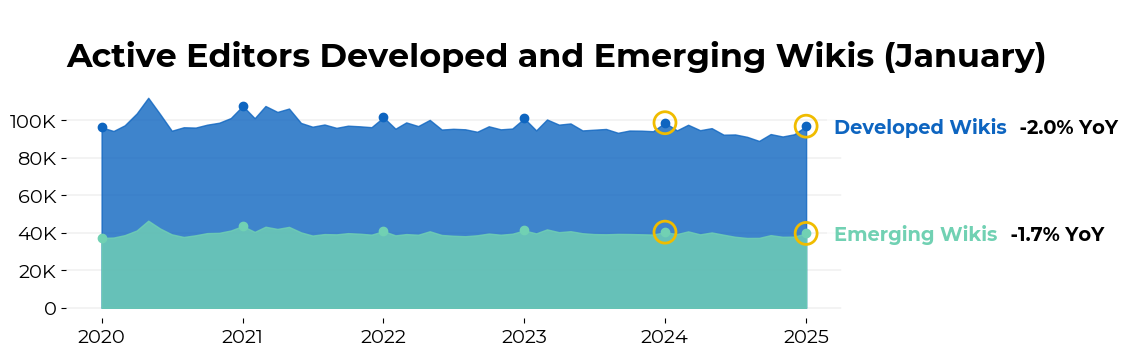

In [89]:
active_editors.main()

Generating Charts: New Active Editors


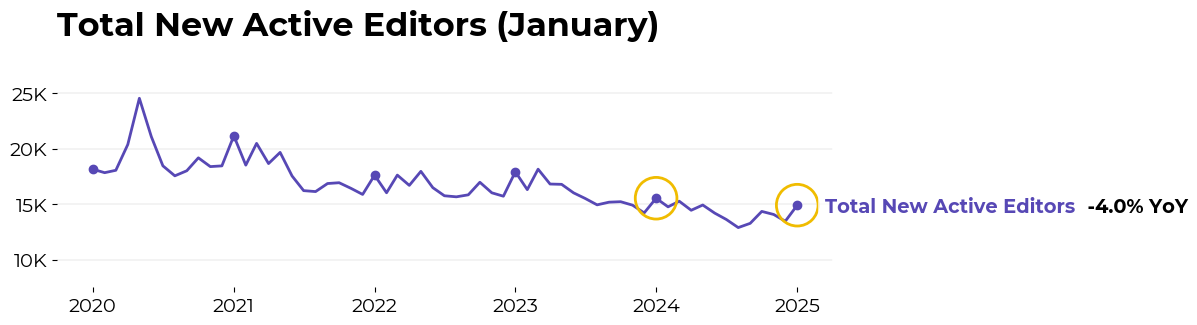

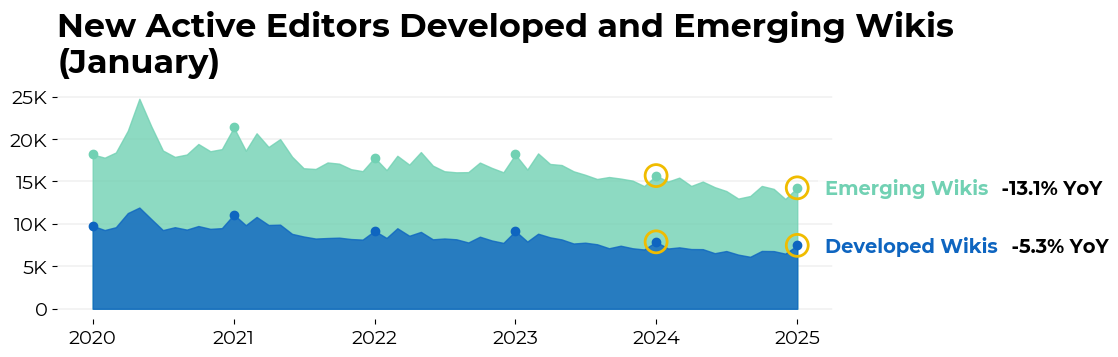

In [90]:
new_active_editors.main()